In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('used car price.csv')

In [10]:
data.tail()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes
9999,2007,18.81,5000,Petrol,1,11634.09,BMW,Automatic,Silver,Full,0,Yes


In [9]:
data.isna().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [17]:
df = data.dropna()

In [18]:
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2014,16.57,5000,Petrol,2,11527.42,Volkswagen,Manual,Silver,Full,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


In [20]:
df.isna().sum(t)

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

In [22]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes


## Multiple Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [27]:
x = df.drop(columns='price_usd')
y = df['price_usd']

In [28]:
kategori = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']

In [30]:
proses = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), kategori)
    ],
    remainder='passthrough'  # fitur numerik biarkan apa adanya
)

In [32]:
pipe = Pipeline([
    ('preprocessor', proses),
    ('model', LinearRegression())
])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [39]:
print("R2 Score:", r2)
print("RMSE:", rmse)

R2 Score: 0.8693707788083221
RMSE: 1003.9093061865229


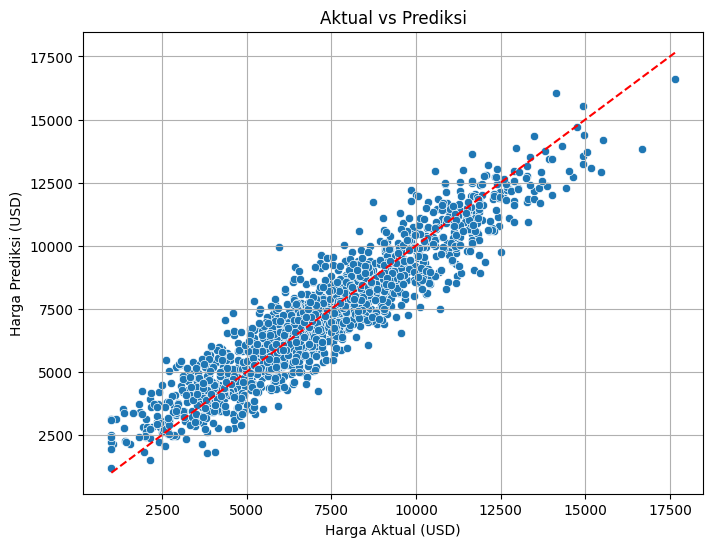

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Harga Aktual (USD)")
plt.ylabel("Harga Prediksi (USD)")
plt.title("Aktual vs Prediksi")
plt.grid(True)
plt.show()

In [57]:
#input sesuka hati untuk melihat harga
prediksi = pd.DataFrame([{
    'make_year': 2017,
    'mileage_kmpl': 25,
    'engine_cc': 1800,
    'fuel_type': 'Diesel',
    'owner_count': 2,
    'brand': 'Honda',
    'transmission': 'Automatic',
    'color': 'White',
    'service_history': 'Yes',
    'accidents_reported': 0,
    'insurance_valid': 'No'
}])

predicted_price = pipe.predict(prediksi)
print("Predicted Price:", predicted_price[0])


Predicted Price: 8721.443772747356
